In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
df = pd.read_csv("advertising.csv")


In [42]:
df.head()    # head define the top 5 rows

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [43]:
df.shape # shape define numbers of columns and row

(200, 4)

In [44]:
df.info() # View data types and check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [45]:
df.describe()  # Summary statistics for numerical columns

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [46]:
# check null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Exploratory Data Analysis (EDA)


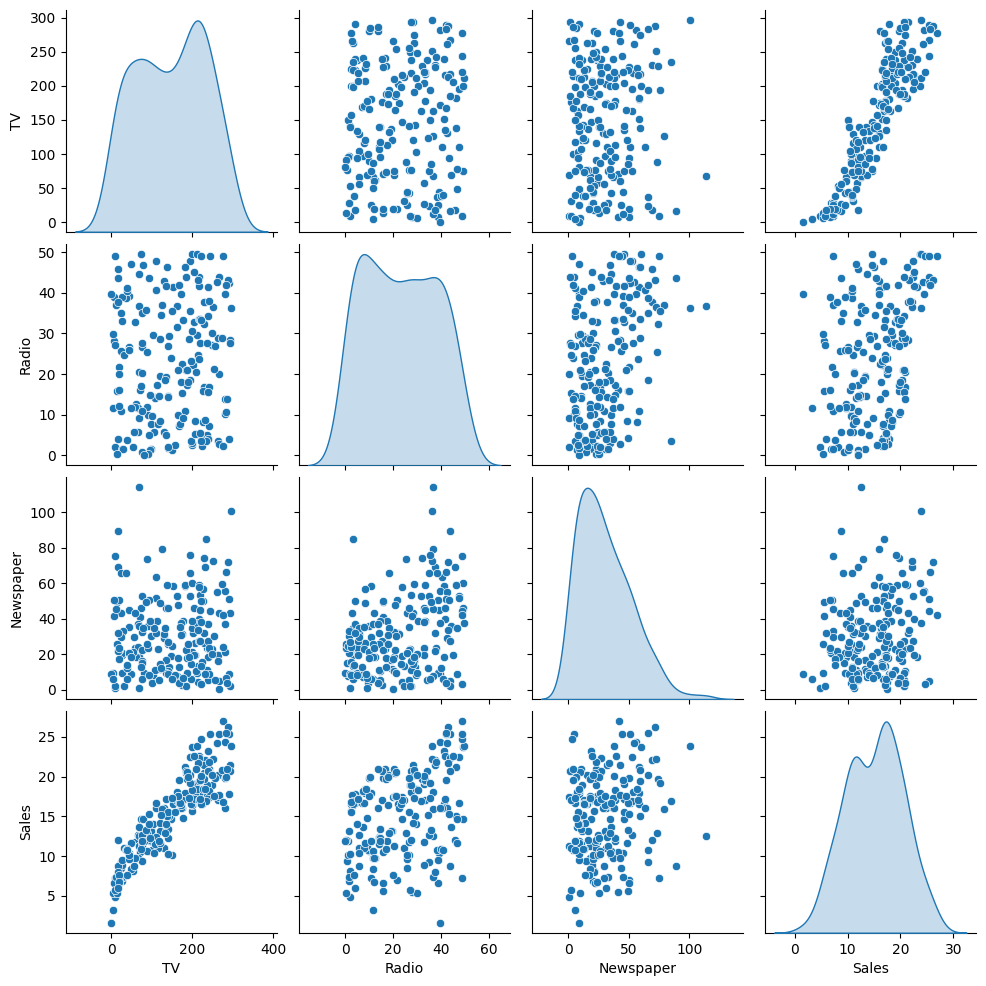

In [10]:
sns.pairplot(df, diag_kind='kde')
plt.show()

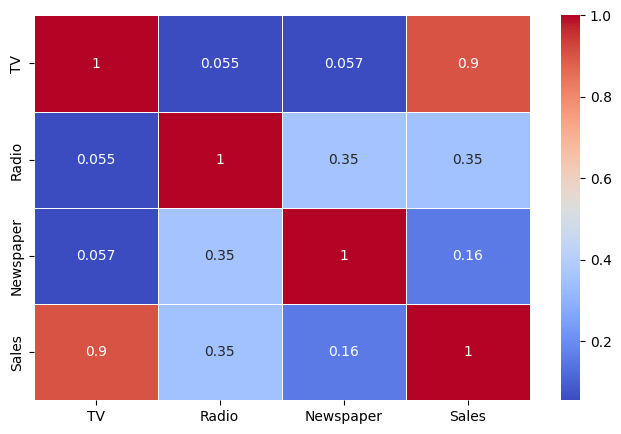

In [11]:
# Correlation Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [36]:
# Feature Selection (X: input, y: target)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


In [37]:
# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [39]:
# Make Predictions
y_pred = model.predict(X_test)

In [17]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 1.2748262109549338
Mean Squared Error (MSE): 2.9077569102710896
Root Mean Squared Error (RMSE): 1.7052146229349223
R² Score: 0.9059011844150826


In [18]:
# Predict Sales for New Advertisement Data
new_data = pd.DataFrame({'TV': [200], 'Radio': [30], 'Newspaper': [50]})
predicted_sales = model.predict(new_data)
print(f"Predicted Sales: {predicted_sales[0]:.2f}")

Predicted Sales: 18.86


In [31]:
# Predict sales on the test set
y_pred = model.predict(X_test)


In [35]:
# Predict sales on the test set
model.score(X_test, y_test)

0.9059011844150826

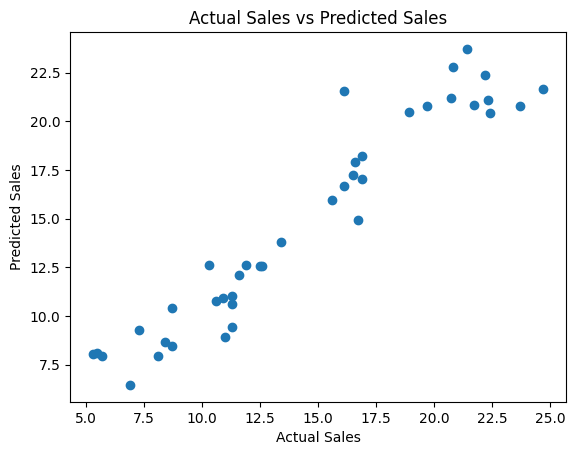

In [34]:
# Step 10: Visualize the predictions vs actual sales
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs Predicted Sales')
plt.show()

In [11]:
# Make Prediction
y_pred = model.predict(X_test)


In [12]:
 # Evaluate Model
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 1.2748262109549338
MSE: 2.9077569102710896
R² Score: 0.9059011844150826


In [16]:
# Check the correlation between the columns
df.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


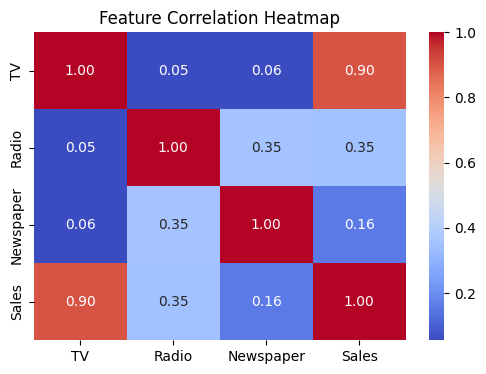

In [13]:
# Correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

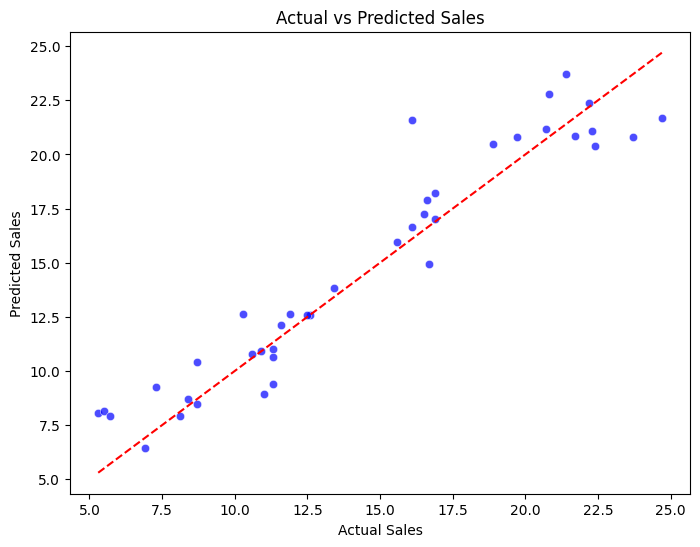

In [20]:
# Scatter Plot: Actual vs. Predicted Sales
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Perfect predictions line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

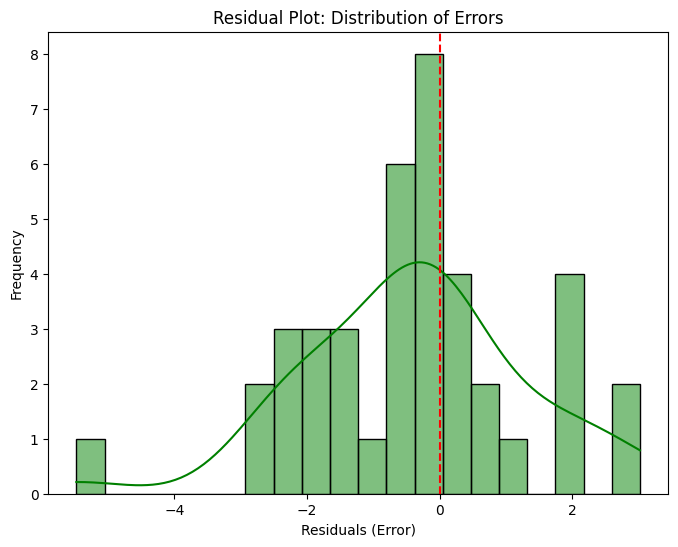

In [22]:
#Residual Plot (Prediction Errors)
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=20, kde=True, color="green")
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residuals (Error)")
plt.ylabel("Frequency")
plt.title("Residual Plot: Distribution of Errors")
plt.show()

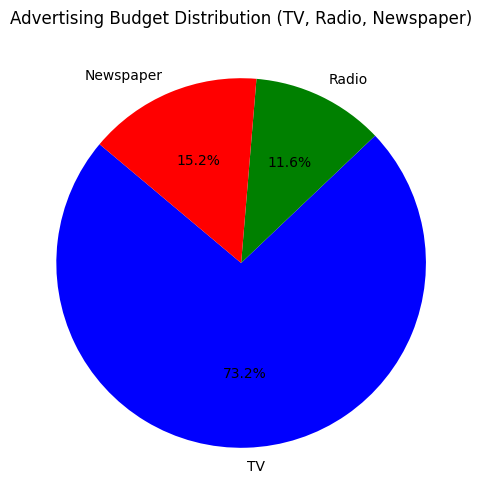

In [28]:
# Calculate total advertising spend per category
total_spent = df[['TV', 'Radio', 'Newspaper']].sum()

# Pie Chart: Contribution of TV, Radio, and Newspaper to Advertising Spend
plt.figure(figsize=(8, 6))
plt.pie(total_spent, labels=total_spent.index, autopct='%1.1f%%', colors=['blue', 'green', 'red'], startangle=140)
plt.title("Advertising Budget Distribution (TV, Radio, Newspaper)")
plt.show()

# Conclusion

In this sales prediction project, we leveraged machine learning, specifically Linear Regression, to forecast sales based on advertising spend in TV, Radio, and Newspaper. By analyzing the model's performance, we observed strong predictive accuracy with metrics like R² score and RMSE. The visualizations, including scatter plots, residual plots, and pie charts, provided insights into how different advertising channels contribute to sales and validated the model's effectiveness. This analysis can help businesses optimize advertising strategies to maximize sales potential.